## learning-AI101 : number prediction (LSTM, GRU)
- 혼자 공부하는 머신러닝과 딥러닝 : 526p~549p
- 2024.08.11.
----

### LSTM
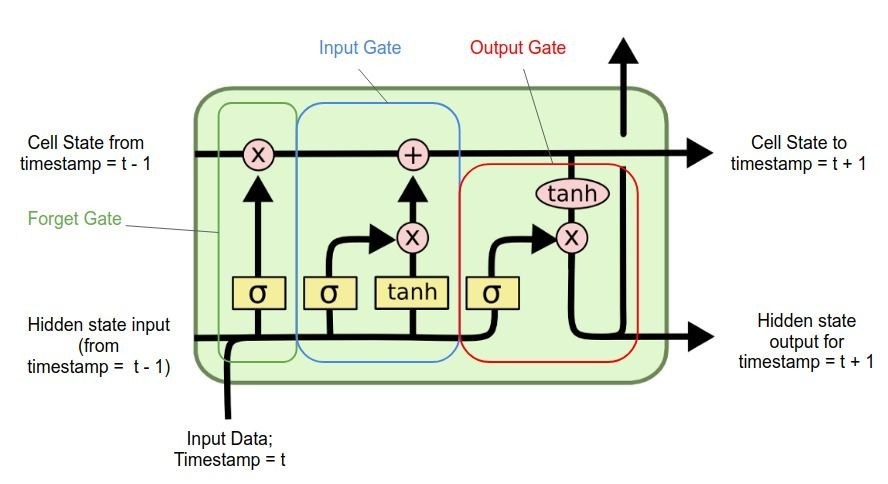

- RNN은 layer가 많이 중첩될 수록 (cell이 많아질 수록) gradient vanishing 혹은 gradient exploding 문제가 발생한다.
    - 당연히 그럴만도 한게, 학습이 진행되면서 이전의 정보는 점차 희석되기 마련이다.
    - 따라서 가장 최근에 들어온 데이터셋에 대한 정보는 또렷히 학습된다.
    - -> **LSTM과 GRU가 도입된다.**
- LSTM
    - Long Short term memory : memory cell (cell state)의 도입으로 인하여 이전 문제점을 해결
    - LSTM의 구조 (간단히 설명)
        - (1) forget gate : 이전 hidden state의 일부를 까먹게 함 
        - (2) input gate : 새로운 정보가 cell state에 더해짐
        - (3) output gate
            - 결과를 출력
            - 다음 cell에 hidden state, cell state를 넘겨줌
- GRU 
    - LSTM과 비슷한데, gate를 하나 덜 사용한다. 하지만 LSTM과 비슷한 성능을 보이기에 효율적이다.
    - 내부적인 설명은 생략.

In [20]:
# GPU 가속화를 위하여

import os
# os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

In [21]:
# 이번 LSTM의 데이터셋은 직접 만든다.
# 예를 들어, [1, 2, 3]이라면 다음 숫자는 4라고 예측하여야 하는 것이다.
# dataset을 구성하기 위해선 split_sequences를 사용하면 되는데, 사실 더 쉽게 하는건 반복문 아닐까?

number = [i for i in range (-100, 100)]
print (len(number))

number_input, number_target = list(), list()

current_ind = 0

while True : 
    if current_ind + 3 >= len(number) :
        break
        
    try : 
        compo_list = number[current_ind : current_ind+3]
    
    except : 
        pass
        
    number_input.append(compo_list)
    number_target.append(number[current_ind]+3)
    current_ind += 1

for i in range (len(number_input)) :
    print (f'row {i} | {number_input[i], number_target[i]}')

200
row 0 | ([-100, -99, -98], -97)
row 1 | ([-99, -98, -97], -96)
row 2 | ([-98, -97, -96], -95)
row 3 | ([-97, -96, -95], -94)
row 4 | ([-96, -95, -94], -93)
row 5 | ([-95, -94, -93], -92)
row 6 | ([-94, -93, -92], -91)
row 7 | ([-93, -92, -91], -90)
row 8 | ([-92, -91, -90], -89)
row 9 | ([-91, -90, -89], -88)
row 10 | ([-90, -89, -88], -87)
row 11 | ([-89, -88, -87], -86)
row 12 | ([-88, -87, -86], -85)
row 13 | ([-87, -86, -85], -84)
row 14 | ([-86, -85, -84], -83)
row 15 | ([-85, -84, -83], -82)
row 16 | ([-84, -83, -82], -81)
row 17 | ([-83, -82, -81], -80)
row 18 | ([-82, -81, -80], -79)
row 19 | ([-81, -80, -79], -78)
row 20 | ([-80, -79, -78], -77)
row 21 | ([-79, -78, -77], -76)
row 22 | ([-78, -77, -76], -75)
row 23 | ([-77, -76, -75], -74)
row 24 | ([-76, -75, -74], -73)
row 25 | ([-75, -74, -73], -72)
row 26 | ([-74, -73, -72], -71)
row 27 | ([-73, -72, -71], -70)
row 28 | ([-72, -71, -70], -69)
row 29 | ([-71, -70, -69], -68)
row 30 | ([-70, -69, -68], -67)
row 31 | ([-6

In [22]:
# dataset을 ndarray로 변경 후 train set, test set, val set 분리하기

import numpy as np
from sklearn.model_selection import train_test_split

number_input, number_target = np.array(number_input), np.array(number_target)

X_train, X_test, y_train, y_test = train_test_split(number_input,
                                                   number_target,
                                                   test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                   y_train,
                                                   test_size=0.2)

print (X_train.shape, X_test.shape, X_val.shape)

(125, 3) (40, 3) (32, 3)


In [23]:
# 입력 데이터의 형태를 (samples, timesteps, features)로 변환

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

In [24]:
# 본 과정에서 padding을 넣을 필요는 없다. 또한 embedding도 필요 없다. 숫자 sequence이기 때문이다.
# modelling으로 바로 넘어간다.

from tensorflow import keras

model1 = keras.Sequential([ # LSTM
    keras.layers.LSTM(50, activation='relu', input_shape=(3, 1)),
    keras.layers.Dense(1)
])

model2 = keras.Sequential([ # GRU
    keras.layers.GRU(50, activation='relu', input_shape=(3, 1)),
    keras.layers.Dense(1)
])

model1.summary()
print()
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50)                10400     
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 50)                7950      
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                             

In [25]:
# compile

rmsprop = keras.optimizers.RMSprop(learning_rate=0.001)
model1.compile(optimizer=rmsprop, loss='MSE')
model2.compile(optimizer=rmsprop, loss='MSE')

Epoch 1/100
4/4 [==============================] - 1s 83ms/step - loss: 3932.5940 - val_loss: 2038.5972
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 3489.9104 - val_loss: 1800.8577
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 3050.2058 - val_loss: 1440.0945
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 2308.3213 - val_loss: 885.4004
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 1296.8057 - val_loss: 402.7264
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 623.6785 - val_loss: 149.3712
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 124.5539 - val_loss: 17.7401
Epoch 8/100
4/4 [==============================] - 0s 8ms/step - loss: 9.3944 - val_loss: 11.1252
Epoch 9/100
4/4 [==============================] - 0s 10ms/step - loss: 6.1565 - val_loss: 10.0696
Epoch 10/100
4/4 [==============================] - 0s 10ms/step - loss: 5.5870 - va

Epoch 84/100
4/4 [==============================] - 0s 8ms/step - loss: 1.0942 - val_loss: 0.2780
Epoch 85/100
4/4 [==============================] - 0s 7ms/step - loss: 0.5005 - val_loss: 0.8195
Epoch 86/100
4/4 [==============================] - 0s 8ms/step - loss: 1.1324 - val_loss: 0.4480
Epoch 87/100
4/4 [==============================] - 0s 7ms/step - loss: 0.3991 - val_loss: 0.7508
Epoch 88/100
4/4 [==============================] - 0s 7ms/step - loss: 2.3003 - val_loss: 2.5604
Epoch 89/100
4/4 [==============================] - 0s 8ms/step - loss: 2.1003 - val_loss: 0.2786
Epoch 90/100
4/4 [==============================] - 0s 7ms/step - loss: 0.1568 - val_loss: 0.1526
Epoch 91/100
4/4 [==============================] - 0s 7ms/step - loss: 0.1484 - val_loss: 0.2742
Epoch 92/100
4/4 [==============================] - 0s 7ms/step - loss: 1.4533 - val_loss: 2.9853
Epoch 93/100
4/4 [==============================] - 0s 7ms/step - loss: 2.4623 - val_loss: 0.6973
Epoch 94/100
4/4 [==

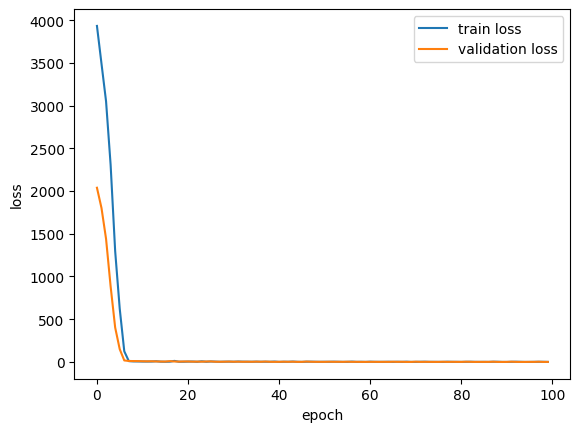

In [26]:
# fitting LSTM and visualization loss

history_LSTM = model1.fit(X_train, y_train, epochs=100, 
                         validation_data=(X_val, y_val))
print (history_LSTM)

# 훈련 손실과 검증 손실 그래프

import matplotlib.pyplot as plt

plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train loss', 'validation loss'])
plt.show()

Epoch 1/100
4/4 [==============================] - 0s 15ms/step - loss: 0.6910 - val_loss: 0.4555
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 0.9202 - val_loss: 0.4704
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 1.6647 - val_loss: 0.5751
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 0.8940 - val_loss: 0.3476
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 1.3707 - val_loss: 1.1428
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 0.8460 - val_loss: 0.4831
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 1.6184 - val_loss: 0.7441
Epoch 8/100
4/4 [==============================] - 0s 10ms/step - loss: 0.6022 - val_loss: 0.0974
Epoch 9/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1807 - val_loss: 0.3806
Epoch 10/100
4/4 [==============================] - 0s 10ms/step - loss: 1.3518 - val_loss: 1.0945
Epoch 11/100
4/4 [=======

4/4 [==============================] - 0s 8ms/step - loss: 0.2454 - val_loss: 0.4280
Epoch 85/100
4/4 [==============================] - 0s 9ms/step - loss: 1.1849 - val_loss: 1.6994
Epoch 86/100
4/4 [==============================] - 0s 8ms/step - loss: 0.9577 - val_loss: 0.0706
Epoch 87/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2042 - val_loss: 0.1105
Epoch 88/100
4/4 [==============================] - 0s 8ms/step - loss: 0.5860 - val_loss: 0.5190
Epoch 89/100
4/4 [==============================] - 0s 7ms/step - loss: 0.5270 - val_loss: 0.4661
Epoch 90/100
4/4 [==============================] - 0s 8ms/step - loss: 1.1896 - val_loss: 0.7797
Epoch 91/100
4/4 [==============================] - 0s 7ms/step - loss: 0.6324 - val_loss: 0.0591
Epoch 92/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0669 - val_loss: 0.1254
Epoch 93/100
4/4 [==============================] - 0s 7ms/step - loss: 0.8927 - val_loss: 0.8364
Epoch 94/100
4/4 [===============

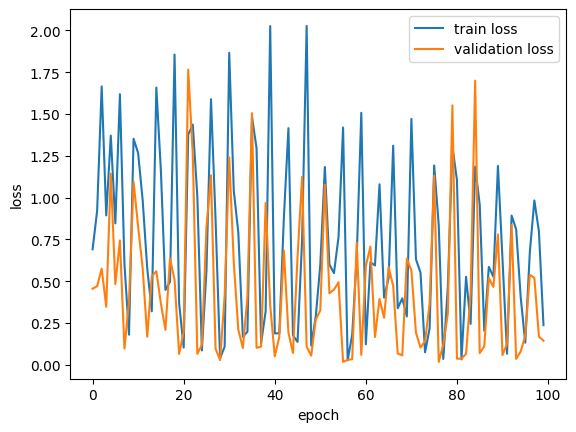

In [27]:
# fitting GRU and visualization loss

history_GRU = model1.fit(X_train, y_train, epochs=100, 
                         validation_data=(X_val, y_val))
print (history_GRU)

# 훈련 손실과 검증 손실 그래프

plt.plot(history_GRU.history['loss'])
plt.plot(history_GRU.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train loss', 'validation loss'])
plt.show()

In [28]:
# predict

print(model1.predict([[100, 101, 102]])) # 103
print(model2.predict([[100, 101, 102]])) # 103

# 오히려 GRU가 더 예측을 못하고 있는 상황을 확인 가능

1/1 [==============================] - 0s 138ms/step
[[102.29921]]
1/1 [==============================] - 0s 150ms/step
[[-6.615499]]
